In [1]:
# Changes have to be made beacause there was import error while importing SMOTE
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn==0.10.0

In [2]:
!pip show scikit-learn imbalanced-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: D:\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, mlxtend, ppscore, scikit-learn-intelex, yellowbrick
---
Name: imbalanced-learn
Version: 0.10.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: D:\anaconda3\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 


In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import IsolationForest,GradientBoostingClassifier
import ppscore as pps
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

In [6]:
raw_data=pd.read_excel("heart_disease.xlsx")

In [7]:
raw_data.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0

In [79]:
raw_data.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

In [80]:
raw_data.shape

(908, 13)

In [81]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
# Checking  for improper data 
raw_data["exang"].unique() 

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [9]:
# Observations: As we Observed I have to convert capital letters to small - let's convert this by using

replace_dict = {
    True: 'true',
    False: 'false'
}
raw_data['exang'] = raw_data['exang'].replace(replace_dict)
raw_data['exang'] = raw_data['exang'].apply(lambda x: x.lower() if isinstance(x, str) else x)

raw_data["exang"] = np.where(raw_data["exang"].values == "ture", "true", raw_data["exang"])

In [10]:
# Now the data is cleaned
raw_data["exang"].value_counts()

false    535
true     373
Name: exang, dtype: int64

In [87]:
# Checking for null values:

raw_data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

Text(0.5, 1.0, 'Checking for null values')

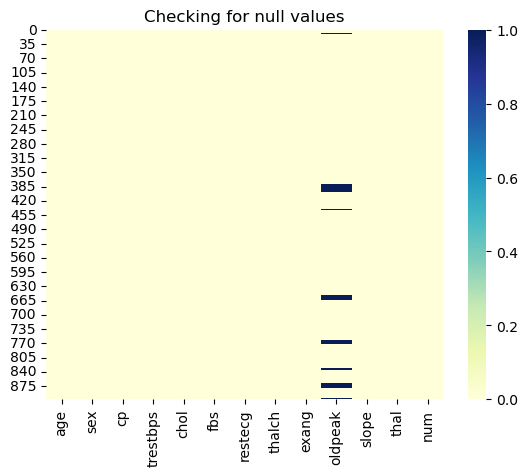

In [88]:
sns.heatmap(data=raw_data.isnull(),cmap="YlGnBu")
plt.title("Checking for null values")

In [11]:
raw_data["oldpeak"].median()

0.5

In [12]:
data = raw_data.copy()
raw_data["oldpeak"]=raw_data["oldpeak"].fillna(raw_data["oldpeak"].median())

In [91]:
raw_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

Text(0.5, 1.0, 'After imputing median with Null Values')

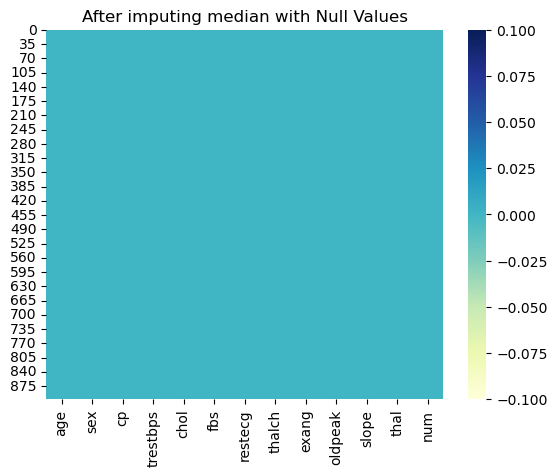

In [92]:
sns.heatmap(data=raw_data.isnull(),cmap="YlGnBu")
plt.title("After imputing median with Null Values")
# Observation:There is no Null Values Found

In [13]:
num_features = raw_data.select_dtypes(include=['int64', 'float64']).columns # spliting numerical data features
for i in raw_data[num_features]:
    print ("---- %s ---" % i)
    print (raw_data[i].value_counts())

---- age ---
54    51
58    43
55    41
57    38
56    38
52    36
59    35
51    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    22
65    21
44    19
47    19
42    18
45    18
38    16
39    15
67    15
66    13
40    13
69    13
37    11
68    10
35     9
70     7
74     7
36     6
71     5
72     4
34     4
75     3
32     2
31     2
76     2
77     2
29     1
73     1
33     1
30     1
Name: age, dtype: int64
---- trestbps ---
120    128
130    114
140    100
110     58
150     55
      ... 
163      1
107      1
174      1
185      1
182      1
Name: trestbps, Length: 85, dtype: int64
---- chol ---
0      172
230      9
211      9
223      9
219      9
      ... 
165      1
161      1
139      1
385      1
109      1
Name: chol, Length: 228, dtype: int64
---- thalch ---
140    42
150    41
120    36
130    30
160    25
       ..
190     1
91      1
185     1
195     1
69      1
Name: thalch, Length: 122, dtype: int64
---

In [14]:
# spliting categorical features
cat_fea = raw_data.select_dtypes(include=['object']).columns 
for i in raw_data[cat_fea]:
    print ("---- %s ---" % i)
    print (raw_data[i].value_counts())


---- sex ---
Male      718
Female    190
Name: sex, dtype: int64
---- cp ---
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: cp, dtype: int64
---- restecg ---
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: restecg, dtype: int64
---- exang ---
false    535
true     373
Name: exang, dtype: int64
---- slope ---
flat           453
upsloping      298
downsloping    157
Name: slope, dtype: int64
---- thal ---
normal               355
reversable defect    349
fixed defect         204
Name: thal, dtype: int64


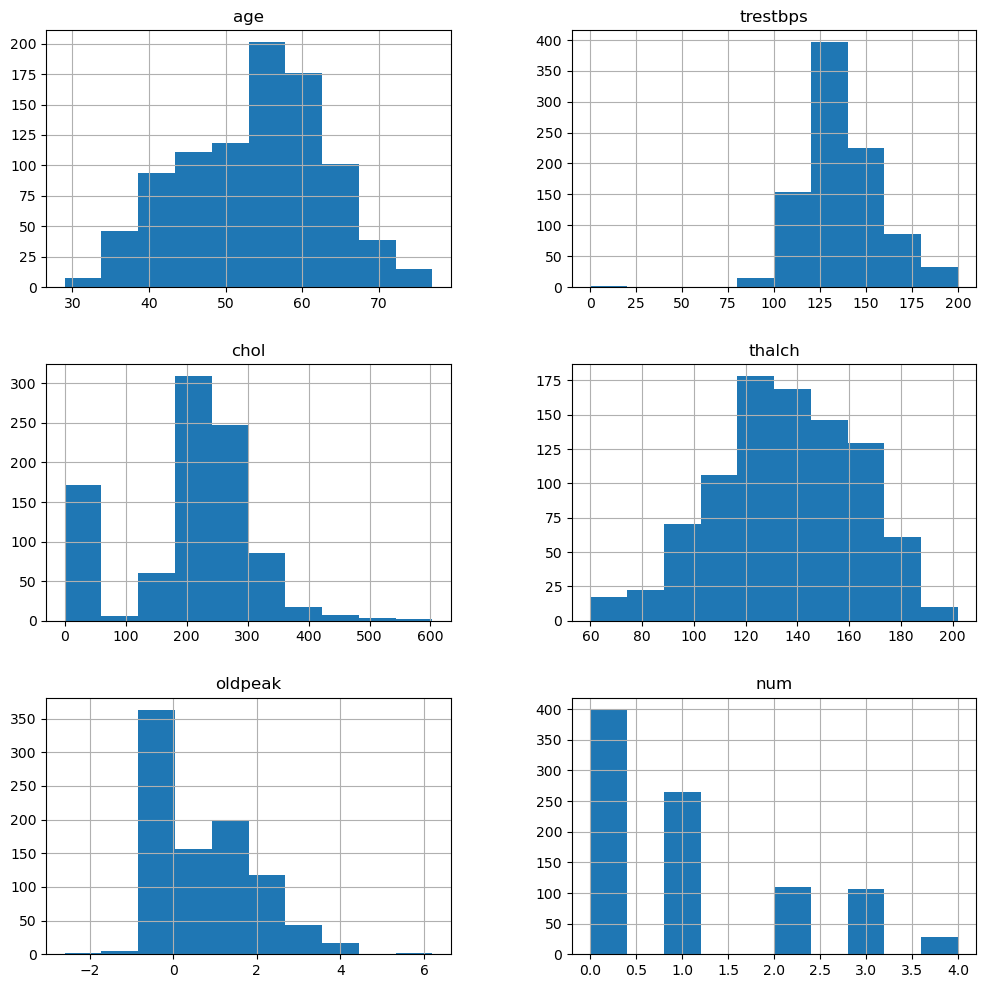

In [96]:
# Data Visualization:
raw_data[num_features].hist(figsize = (12,12))# # visualizing numerical data features
plt.show()

In [97]:
# Outliers Visualization:

def box_plot(df):
    # Create box plots for numerical variables
    fig, axes = plt.subplots(df.shape[1], 1, figsize=(10, df.shape[1] * 2))
    axes = axes.flatten()
    for ax, col in zip(axes, df.columns):
        sns.boxplot(x=df[col], ax=ax, palette="crest")
        ax.set_xlabel(col)
        ax.set_ylabel("Range")

    plt.tight_layout()
    plt.show()

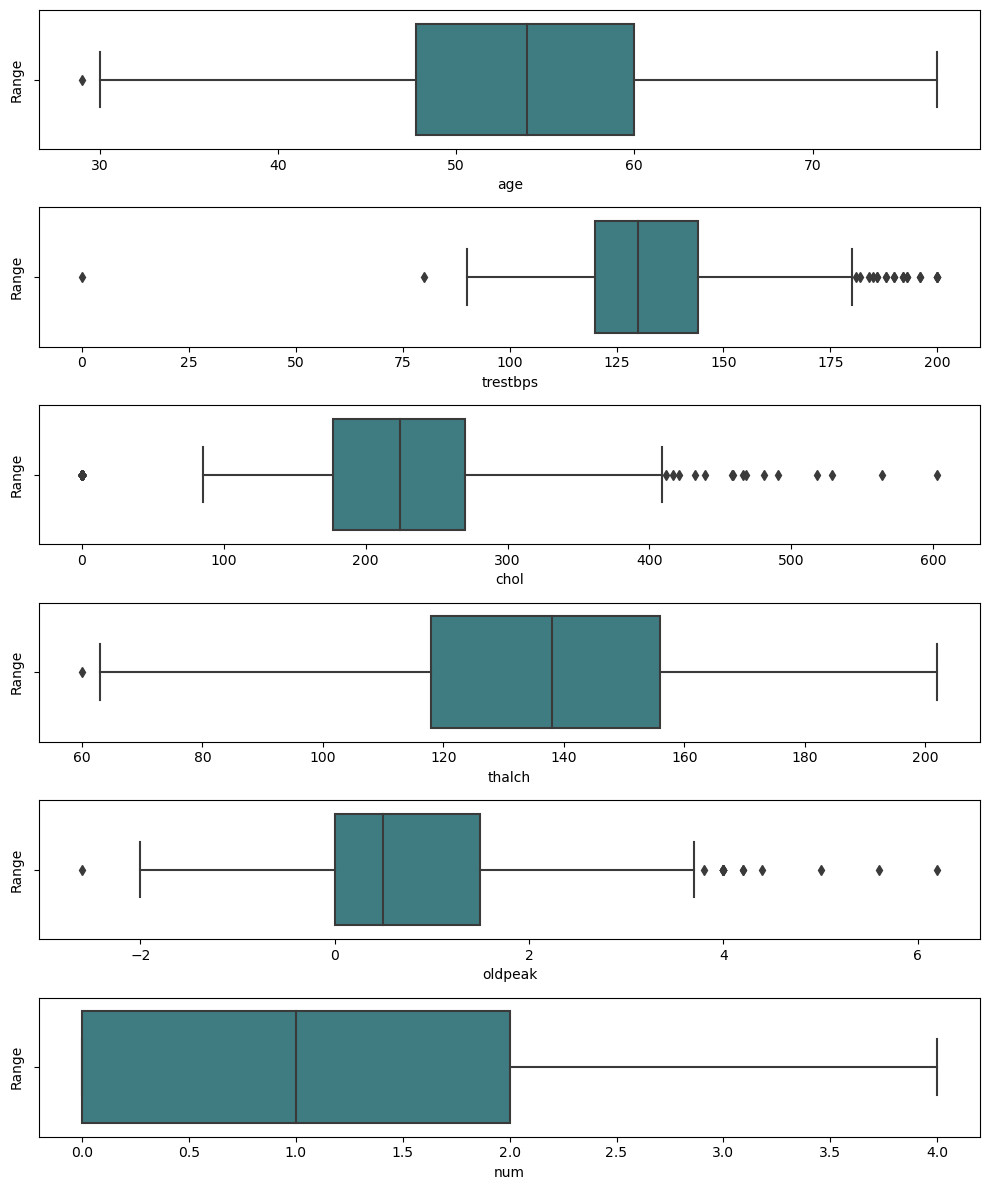

In [98]:
box_plot(raw_data[num_features])

        Count       %
Male      718  79.07%
Female    190  20.93%


Text(0.5, 1.0, 'Gender distribution')

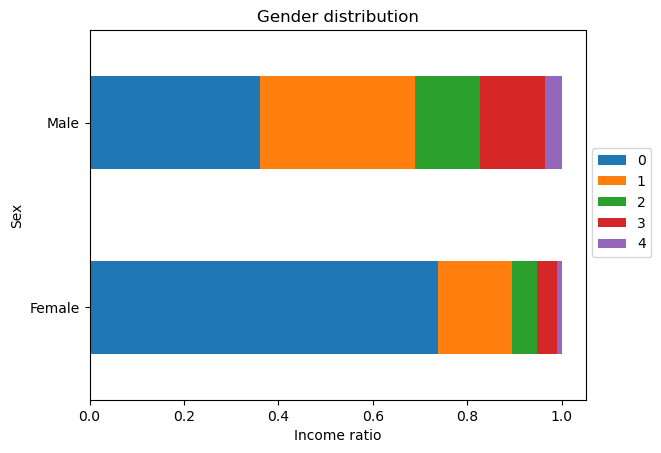

In [15]:
t=raw_data.sex
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = raw_data.groupby(['sex', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend( bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Sex')
plt.xlabel('Income ratio')
plt.title("Gender distribution")

                 Count       %
asymptomatic       495  54.52%
non-anginal        203  22.36%
atypical angina    165  18.17%
typical angina      45   4.96%


Text(0.5, 1.0, 'chest pain distribution')

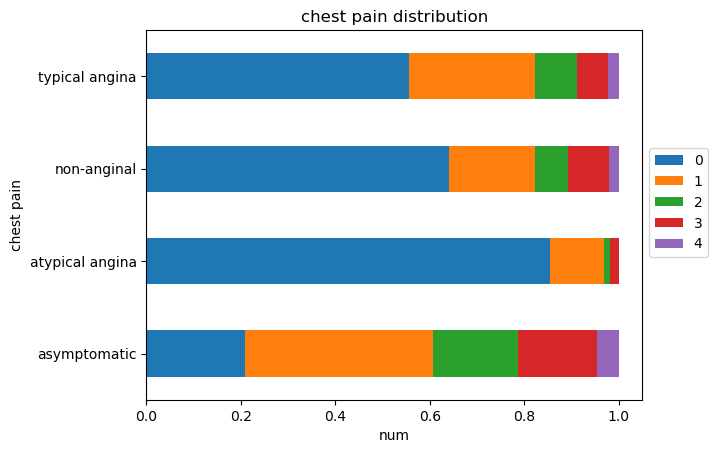

In [16]:
t=raw_data.cp
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = raw_data.groupby(['cp', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1.0, 0.7))
plt.ylabel('chest pain')
plt.xlabel('num')
plt.title("chest pain distribution")

                  Count       %
normal              542  59.69%
lv hypertrophy      187  20.59%
st-t abnormality    179  19.71%


Text(0.5, 1.0, 'restecg distribution')

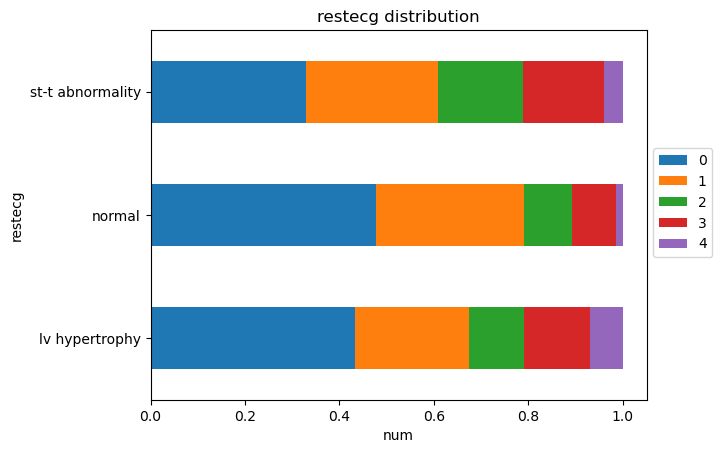

In [17]:
t=raw_data.restecg
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = raw_data.groupby(['restecg', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1.0, 0.7))
plt.ylabel('restecg')
plt.xlabel('num')
plt.title("restecg distribution")

       Count       %
false    535  58.92%
true     373  41.08%


Text(0.5, 1.0, 'exang distribution')

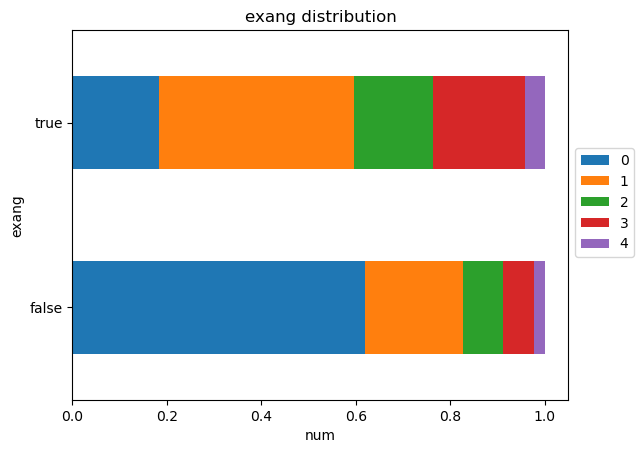

In [18]:
t=raw_data.exang
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = raw_data.groupby(['exang', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1.0, 0.7))
plt.ylabel('exang')
plt.xlabel('num')
plt.title("exang distribution")

             Count       %
flat           453  49.89%
upsloping      298  32.82%
downsloping    157  17.29%


Text(0.5, 1.0, 'slope distribution')

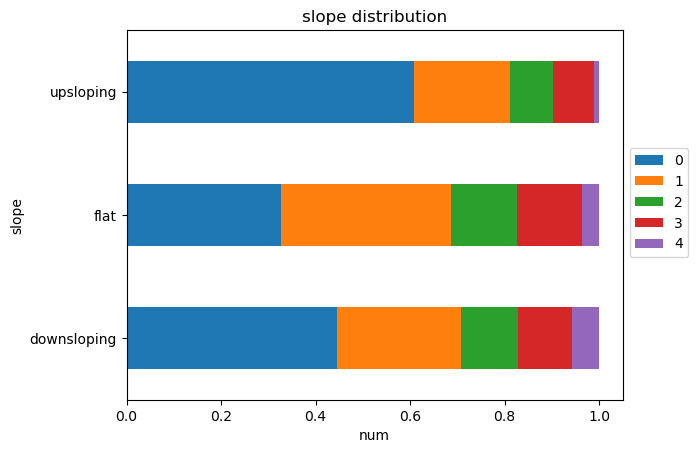

In [19]:
t=raw_data.slope
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = raw_data.groupby(['slope', 'num']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(bbox_to_anchor=(1.0, 0.7))
plt.ylabel('slope')
plt.xlabel('num')
plt.title("slope distribution")

In [20]:
# Encoding Techniques:
# LabelEncoding:
cat_fea # categorical Features

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [21]:
le=LabelEncoder()
raw_data["cp"]=le.fit_transform(raw_data["cp"])
raw_data["restecg"]=le.fit_transform(raw_data["restecg"])
raw_data["exang"]=le.fit_transform(raw_data["exang"])
raw_data["slope"]=le.fit_transform(raw_data["slope"])
raw_data["thal"]=le.fit_transform(raw_data["thal"])
raw_data["sex"]=le.fit_transform(raw_data["sex"])
raw_data.head()

age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang  oldpeak  \
0   63    1   3       145   233   True        0     150      0      2.3   
1   41    1   1       135   203  False        1     132      0      0.0   
2   57    1   0       140   192  False        1     148      0      0.4   
3   52    1   3       118   186  False        0     190      0      0.0   
4   57    1   0       110   201  False        1     126      1      1.5   

   slope  thal  num  
0      0     0    0  
1      1     0    0  
2      1     0    0  
3      1     0    0  
4      1     0    0

C:\Users\ajayd\AppData\Local\Temp\ipykernel_18888\1543155951.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data[col], ax=ax, bins=20)  # Plot KDE on the specified subplot
C:\Users\ajayd\AppData\Local\Temp\ipykernel_18888\1543155951.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ra

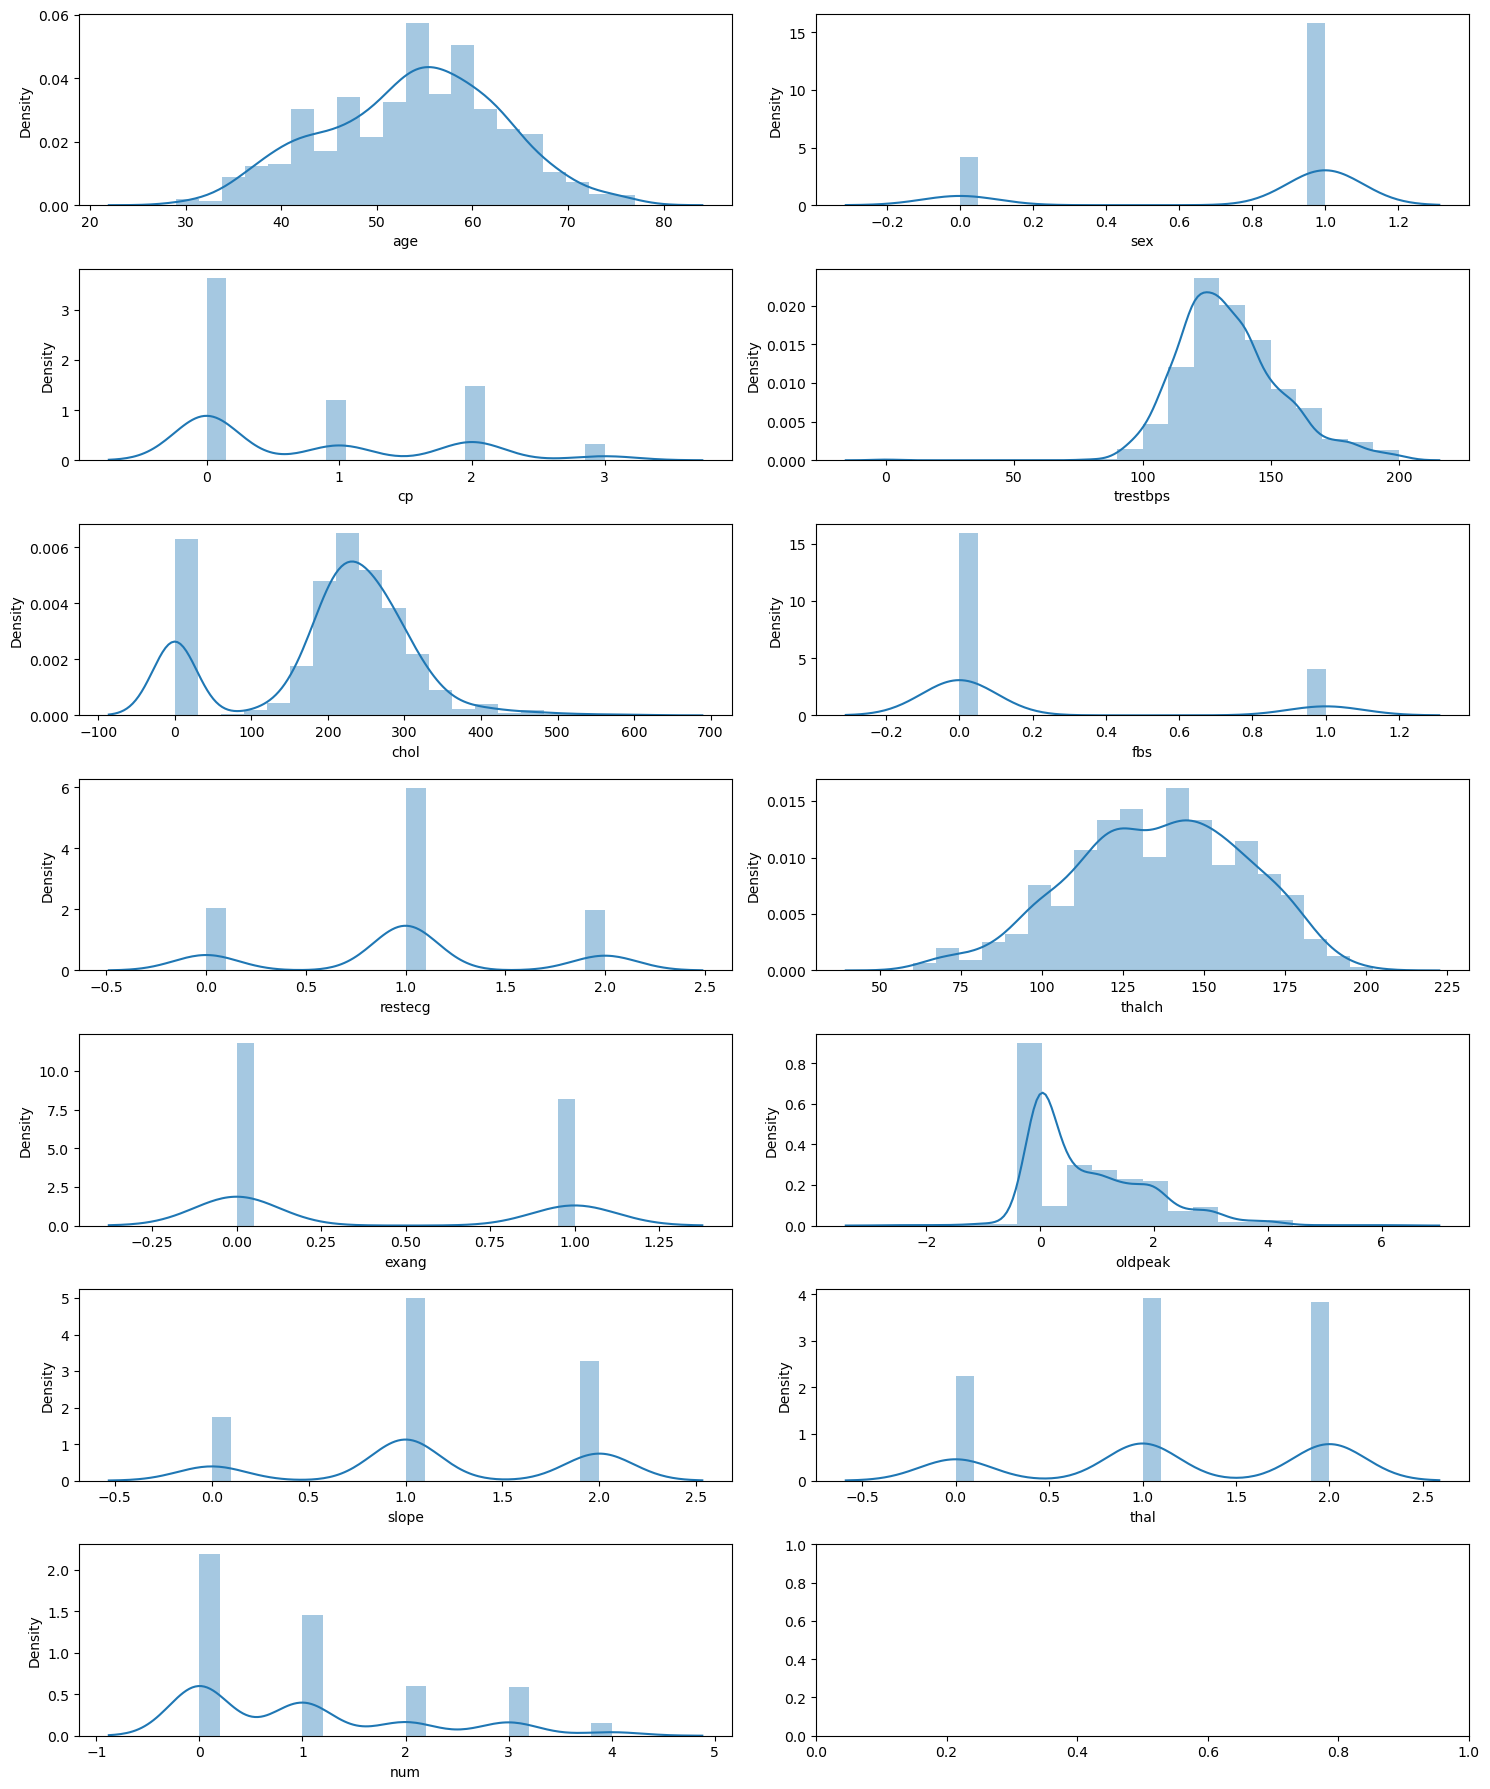

In [22]:
fig, axes = plt.subplots(7,2, figsize=(15,18))  # 5 rows, 2 columns

# Flatten the axes to make iteration easier
axes = axes.flatten()

# Iterate over the columns and subplots to create KDE plots
for ax, col in zip(axes, raw_data.columns):
    sns.distplot(raw_data[col], ax=ax, bins=20)  # Plot KDE on the specified subplot
    ax.set_ylabel('Density')  # KDE plots often use "Density" as y-axis label

# Adjust layout to avoid overlapping and ensure proper spacing
plt.tight_layout()

# Display the plots
plt.show()

In [23]:
# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.25, random_state=42)
outliers = iso_forest.fit_predict(raw_data[num_features])

D:\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [24]:
# -1 indicates an outlier, 1 indicates an inlier
raw_data['outlier'] = outliers
raw_data["outlier"].value_counts()

 1    681
-1    227
Name: outlier, dtype: int64

In [25]:
# Remove outliers
cleaned_data = raw_data[raw_data['outlier'] == 1].drop(columns=['outlier'])

print(cleaned_data)

     age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang  oldpeak  \
0     63    1   3       145   233   True        0     150      0      2.3   
1     41    1   1       135   203  False        1     132      0      0.0   
2     57    1   0       140   192  False        1     148      0      0.4   
3     52    1   3       118   186  False        0     190      0      0.0   
4     57    1   0       110   201  False        1     126      1      1.5   
..   ...  ...  ..       ...   ...    ...      ...     ...    ...      ...   
854   67    1   3       142   270   True        1     125      0      2.5   
857   58    1   0       160   256   True        0     113      1      1.0   
864   65    1   0       150   236   True        2     105      1      0.0   
865   63    1   2       130     0  False        2     111      1      0.0   
867   69    1   0       140   208  False        2     140      1      2.0   

     slope  thal  num  
0        0     0    0  
1        1     0    0  
2  

In [26]:
# After Removing Outliers By Using Isolation Techniques:

box_plot(cleaned_data[num_features])
# Observation: ouliers are reduced

NameError: name 'box_plot' is not defined

In [27]:
# data values scores based on isolation forest decision function in scale of 0 to 1
data_scores = cleaned_data.copy()
data_scores["scores"] = iso_forest.decision_function(cleaned_data[num_features])
data_scores

age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang  oldpeak  \
0     63    1   3       145   233   True        0     150      0      2.3   
1     41    1   1       135   203  False        1     132      0      0.0   
2     57    1   0       140   192  False        1     148      0      0.4   
3     52    1   3       118   186  False        0     190      0      0.0   
4     57    1   0       110   201  False        1     126      1      1.5   
..   ...  ...  ..       ...   ...    ...      ...     ...    ...      ...   
854   67    1   3       142   270   True        1     125      0      2.5   
857   58    1   0       160   256   True        0     113      1      1.0   
864   65    1   0       150   236   True        2     105      1      0.0   
865   63    1   2       130     0  False        2     111      1      0.0   
867   69    1   0       140   208  False        2     140      1      2.0   

     slope  thal  num    scores  
0        0     0    0  0.039748  
1        1     0    0  0.089863  
2        1     0    0  0.091447  
3        1     0    0  0.032459  
4        1     0    0  0.048179  
..     ...   ...  ...       ...  
854      2     2    3  0.012204  
857      2     2    3  0.019119  
864      1     1    3  0.015074  
865      1     0    3  0.016794  
867      2     0    3  0.007000  

[681 rows x 14 columns]

In [28]:
# Features Scaling:
# apply standard Scaler:

data = cleaned_data
scaler = StandardScaler()
std_scaled_num_data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

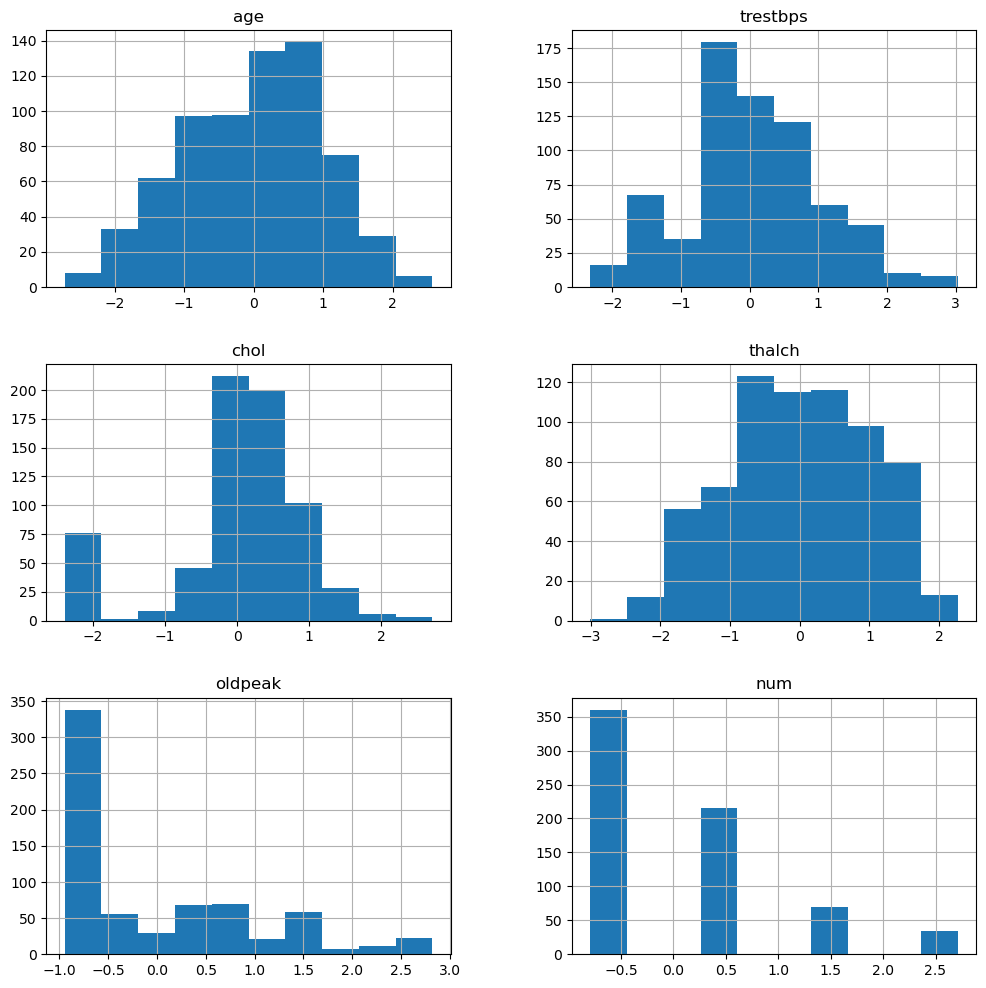

In [29]:
# visualize standard Scaler for Numerical Features:

std_scaled_num_data[num_features].hist(figsize = (12,12)) # visualizing numerical data features
plt.show()

In [30]:
# apply MInMax Scaler :

data = cleaned_data
scaler = MinMaxScaler()
mimx_scaled_num_data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

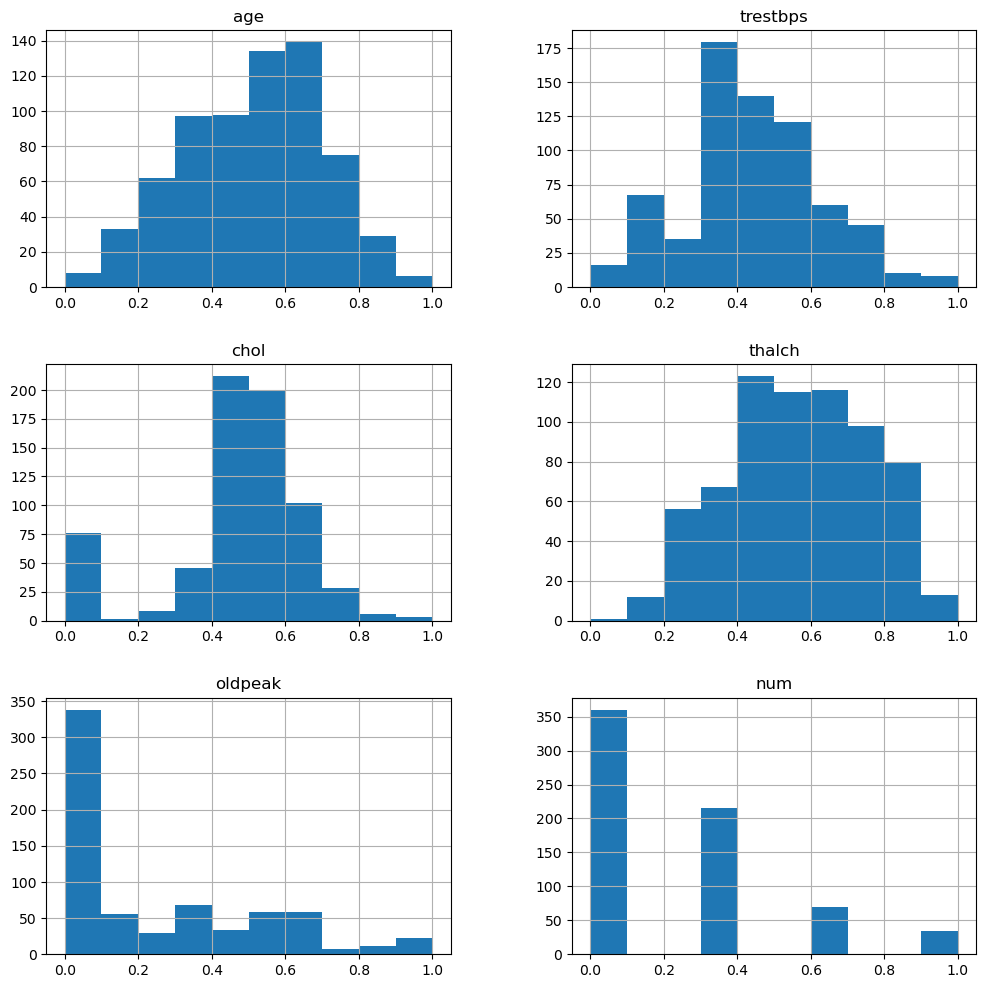

In [31]:
# visualize MInMax Scaler for Numerical features:

mimx_scaled_num_data[num_features].hist(figsize = (12,12))# # visualizing numerical data features
plt.show()

In [32]:
# apply log Transformation

# Add a small constant to avoid log(0)
log_tfm_data = np.log1p(cleaned_data)  # np.log1p is equivalent to np.log(1 + x)
#log_tfm_data

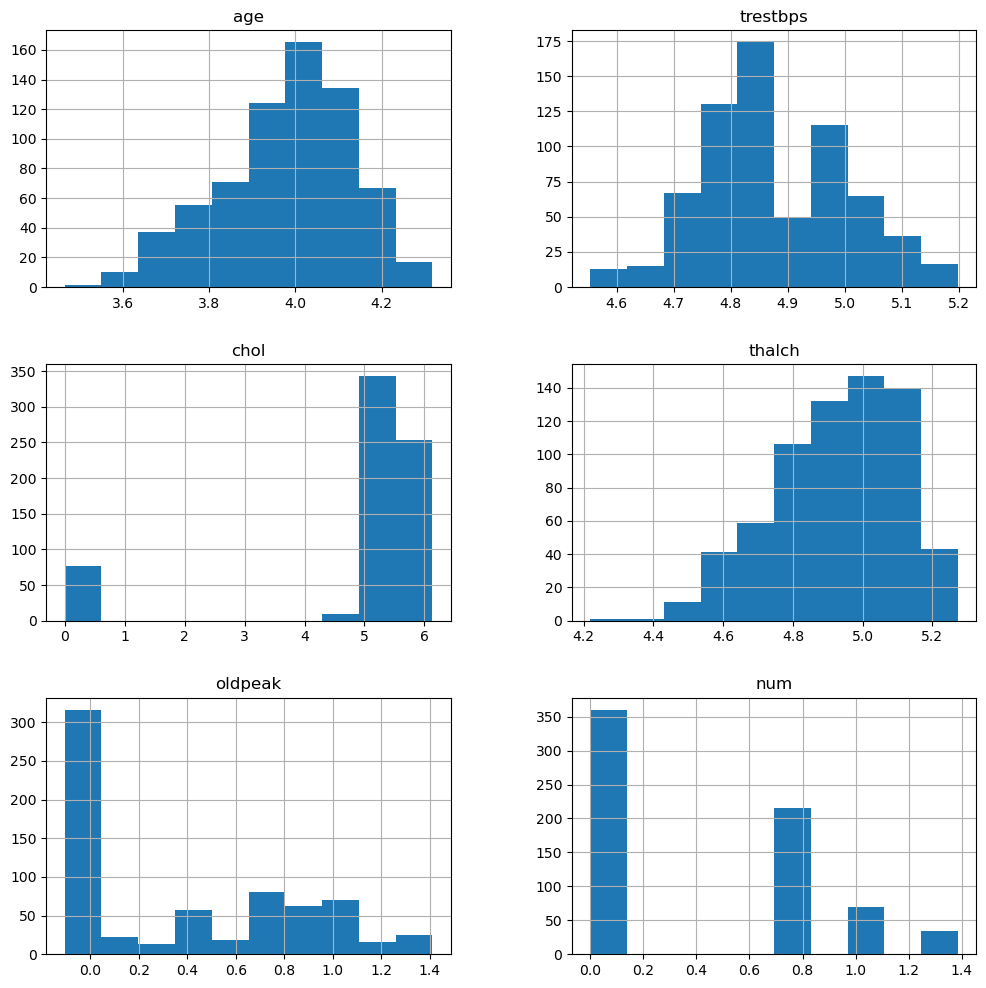

In [33]:
log_tfm_data[num_features].hist(figsize = (12,12)) # visualizing numerical data features
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


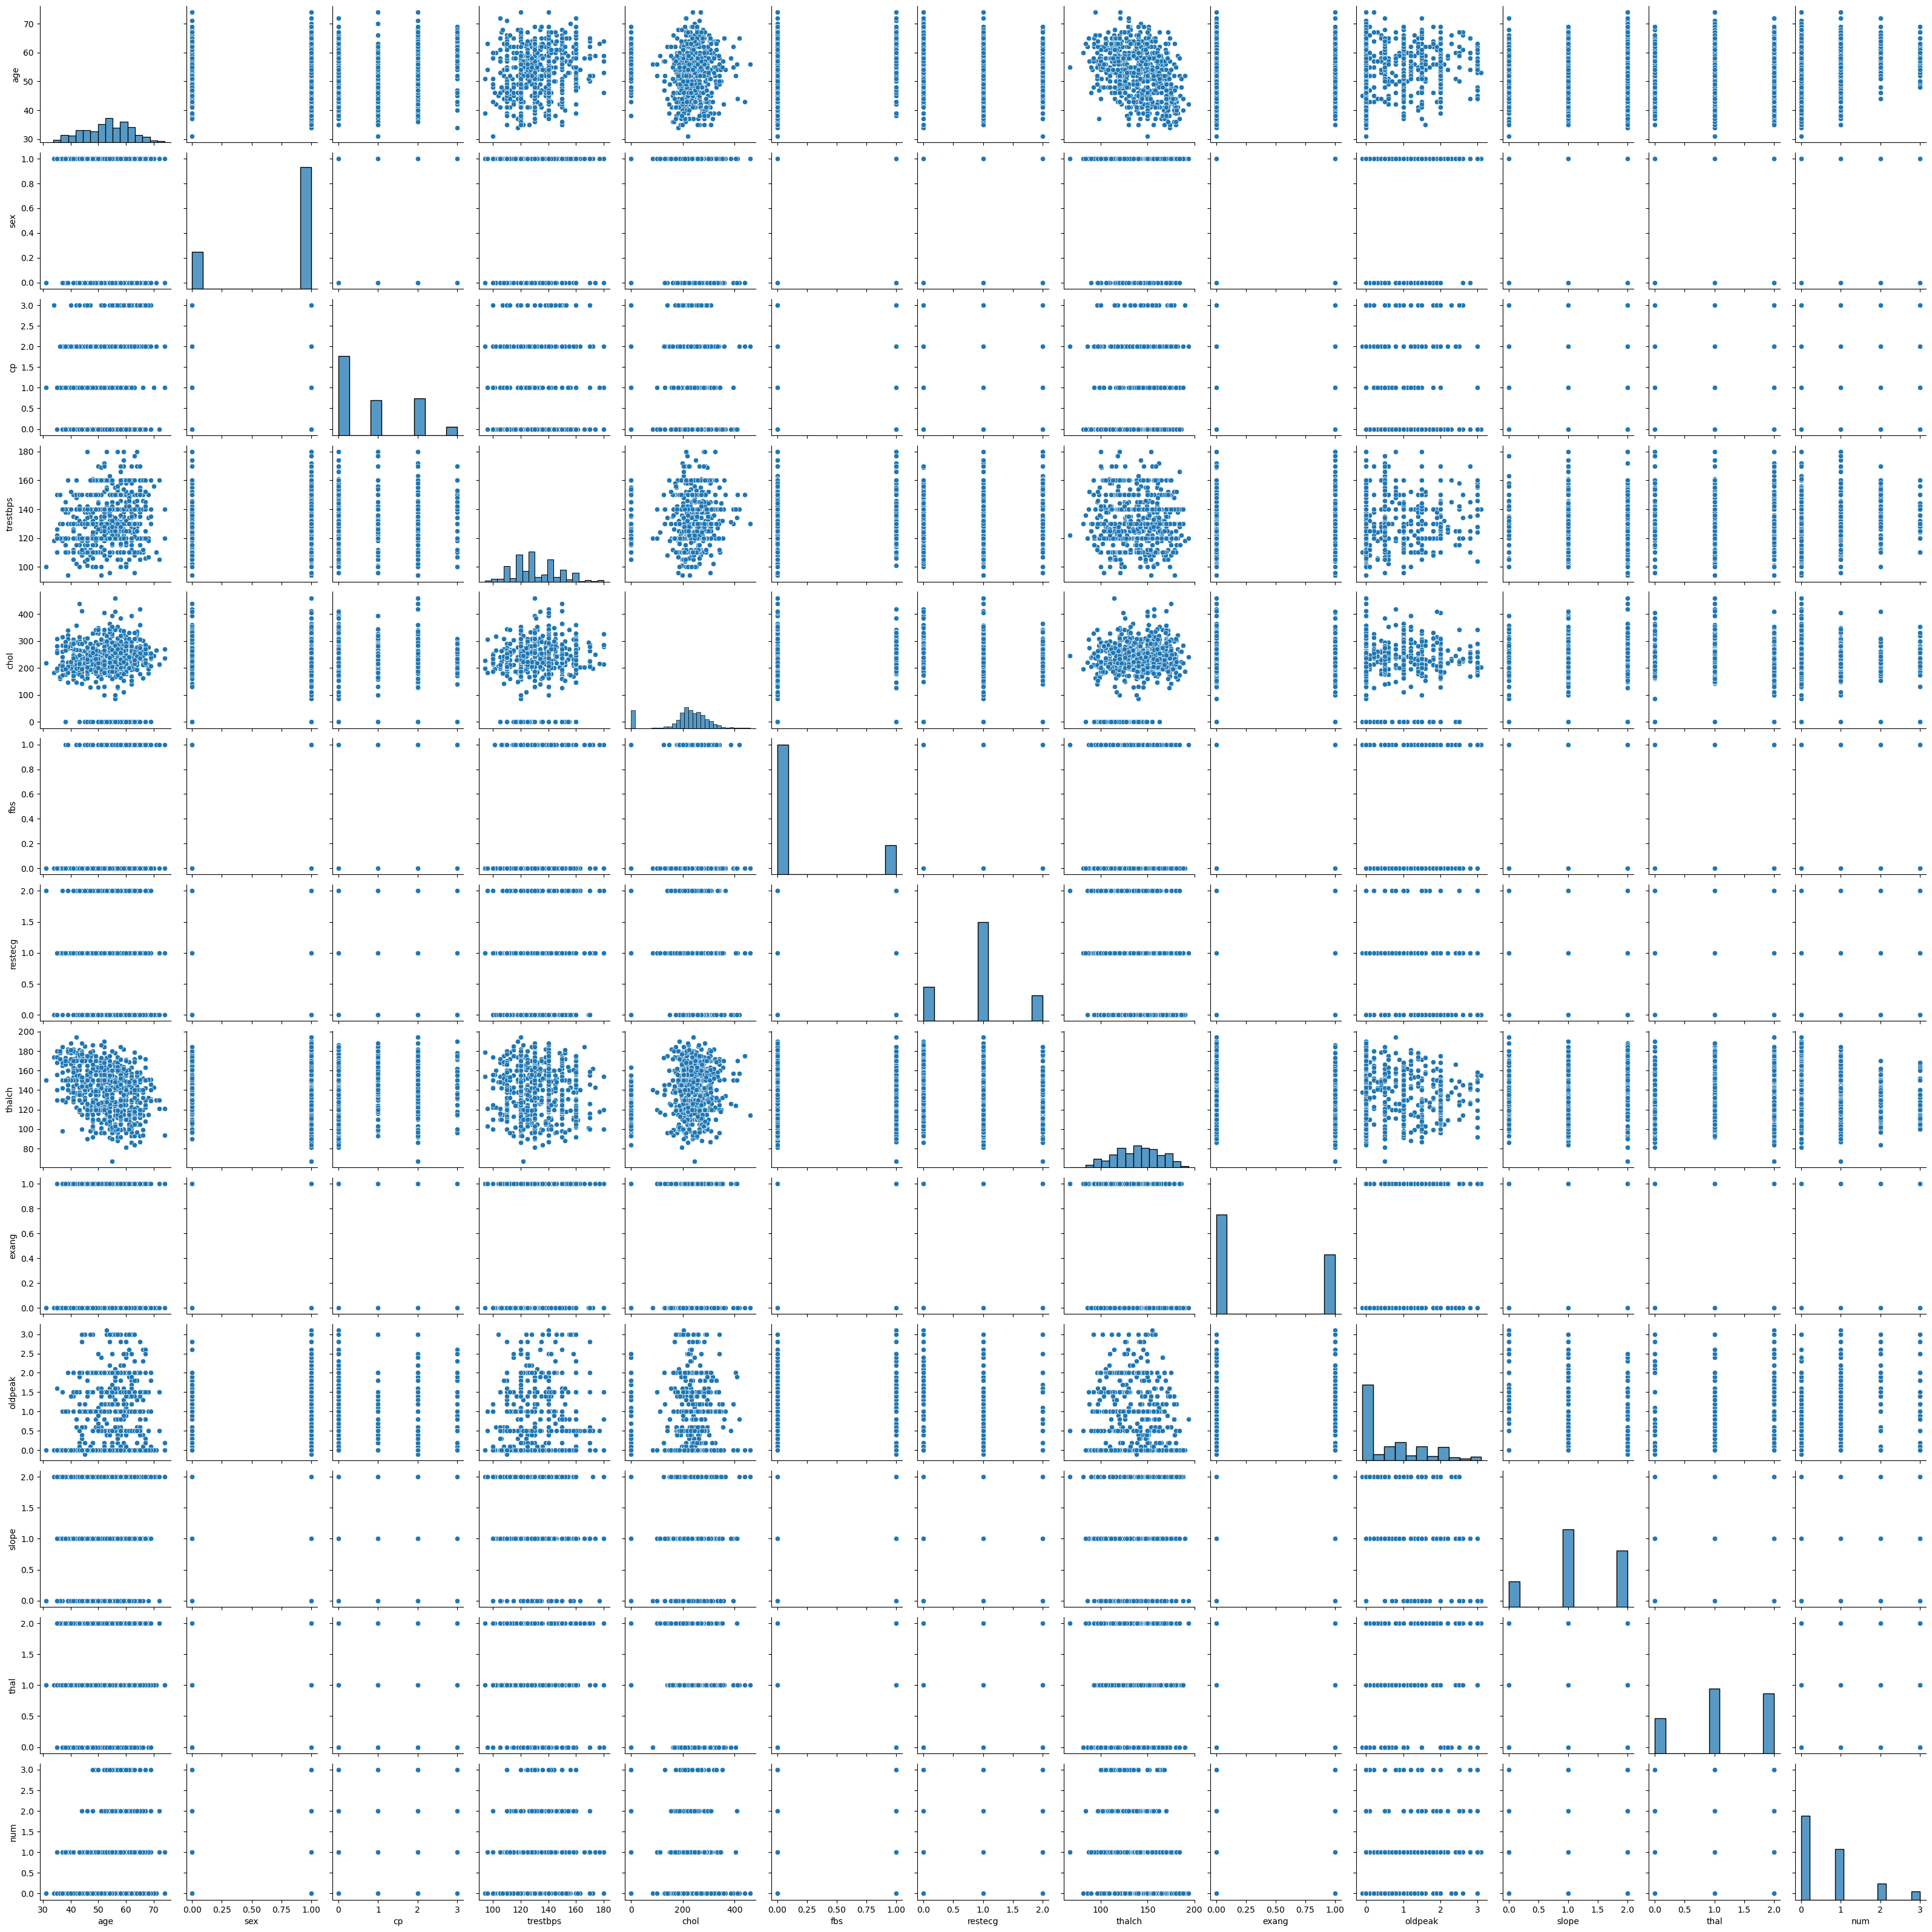

In [34]:
# visualize pairplot correlation between features to target

sns.pairplot(cleaned_data)

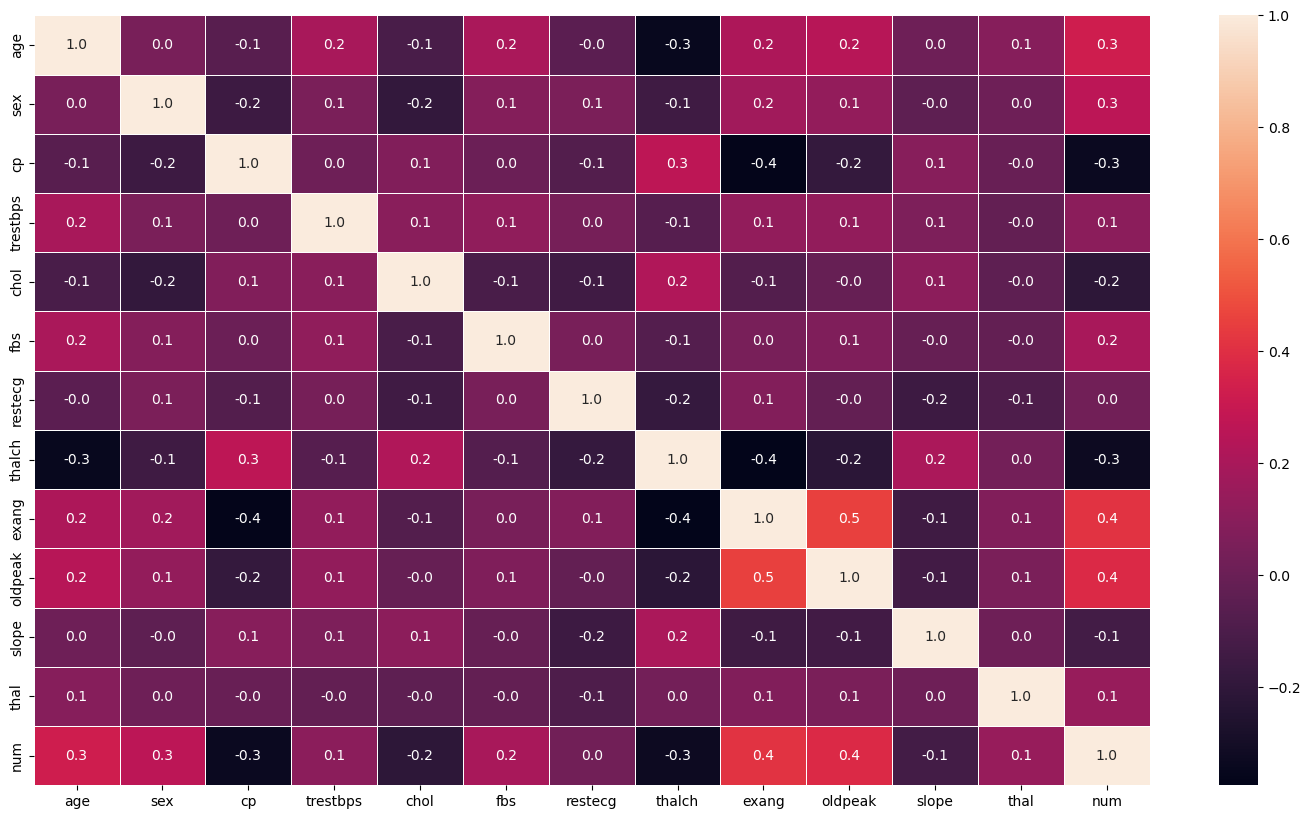

In [35]:
# visualize Heatmap

f,ax = plt.subplots(figsize=(18,10))
sns.heatmap(cleaned_data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

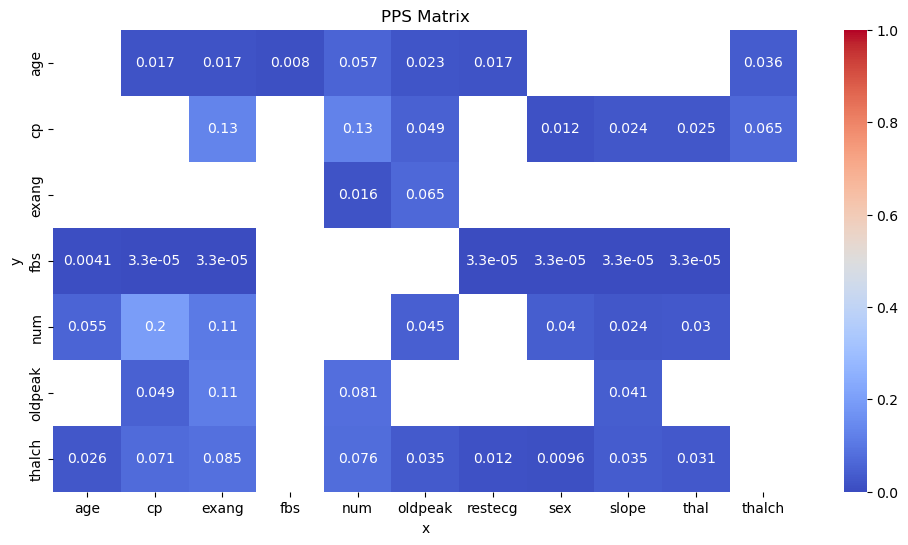

In [36]:
# Calculate PPS matrix
pps_matrix = pps.matrix(cleaned_data)

# Display PPS matrix
pps_matrix_filtered = pps_matrix[(pps_matrix['ppscore'] > 0.0) & (pps_matrix['x'] != pps_matrix['y'])]
pps_matrix_pivot = pps_matrix_filtered.pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize=(12, 6))
sns.heatmap(pps_matrix_pivot, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('PPS Matrix')
plt.show()

In [37]:
# Decision Tree Classification:
# Split The Data into Train and test 80% - 20%

X = log_tfm_data.drop(columns=["num"])
y =cleaned_data["num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train

age       sex        cp  trestbps      chol  fbs   restecg  \
567  3.850148  0.693147  0.000000  4.709530  5.468060  0.0  0.693147   
249  3.891820  0.000000  0.000000  4.795791  5.541264  0.0  1.098612   
21   4.174387  0.000000  0.000000  4.875197  5.717028  0.0  0.693147   
551  4.007333  0.000000  0.000000  4.934474  5.616771  0.0  0.693147   
278  4.110874  0.693147  1.098612  4.795791  5.509388  0.0  0.000000   
..        ...       ...       ...       ...       ...  ...       ...   
76   3.970292  0.693147  0.693147  4.905275  5.308268  0.0  0.693147   
112  3.663562  0.693147  1.098612  4.934474  5.170484  0.0  0.693147   
299  3.637586  0.000000  1.098612  4.875197  5.356586  0.0  0.693147   
489  3.931826  0.693147  0.000000  4.976734  5.857933  0.0  0.000000   
108  4.219508  0.000000  1.098612  5.030438  5.627621  0.0  0.693147   

       thalch     exang   oldpeak     slope      thal  
567  4.836282  0.693147  1.098612  0.693147  0.000000  
249  4.709530  0.000000  0.000000  0.000000  1.098612  
21   4.812184  0.000000  1.098612  0.693147  0.693147  
551  4.663439  0.693147  0.916291  0.693147  0.000000  
278  4.912655  0.000000  0.000000  0.000000  0.000000  
..        ...       ...       ...       ...       ...  
76   5.068904  0.000000  0.587787  1.098612  0.693147  
112  5.159055  0.000000  0.000000  1.098612  0.693147  
299  4.962845  0.000000  0.000000  1.098612  1.098612  
489  4.795791  0.693147  0.693147  1.098612  1.098612  
108  5.153292  0.000000  0.000000  1.098612  0.693147  

[544 rows x 12 columns]

In [39]:
# Implement a Decision Tree Classification model using a library like scikit-learn

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = dtc.predict(X_test)

In [41]:
print(confusion_matrix(y_test, y_pred))

[[62 16  9  0]
 [ 8 13  3  2]
 [ 5  6  4  1]
 [ 2  3  2  1]]


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        87
           1       0.34      0.50      0.41        26
           2       0.22      0.25      0.24        16
           3       0.25      0.12      0.17         8

    accuracy                           0.58       137
   macro avg       0.40      0.40      0.39       137
weighted avg       0.62      0.58      0.59       137



In [43]:
dtc.feature_importances_

array([0.13681539, 0.03525045, 0.14823365, 0.09297662, 0.09813486,
       0.03040146, 0.0540154 , 0.16287072, 0.04742841, 0.10117214,
       0.02269705, 0.07000385])

In [44]:
features_imp_scores = pd.DataFrame(dtc.feature_importances_, index= X.columns)
features_imp_scores[0].sort_values(ascending=False)

thalch      0.162871
cp          0.148234
age         0.136815
oldpeak     0.101172
chol        0.098135
trestbps    0.092977
thal        0.070004
restecg     0.054015
exang       0.047428
sex         0.035250
fbs         0.030401
slope       0.022697
Name: 0, dtype: float64

In [45]:
# Hyperparameter Tuning:
X = log_tfm_data.drop(columns=["num"])
y =cleaned_data["num"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42, sampling_strategy={1: 273, 2: 273, 3: 273})
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [48]:
# Define the model and reduced parameter grid
clf = GradientBoostingClassifier(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, scoring='f1_weighted', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)
best_clf = random_search.best_estimator_

In [49]:
# Model Evaluation and Analysis:
# Predict and evaluate on the test set
y_pred = best_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[64 20  2  1]
 [ 7 12  2  5]
 [ 4  9  3  0]
 [ 1  4  1  2]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        87
           1       0.27      0.46      0.34        26
           2       0.38      0.19      0.25        16
           3       0.25      0.25      0.25         8

    accuracy                           0.59       137
   macro avg       0.43      0.41      0.41       137
weighted avg       0.64      0.59      0.61       137



In [61]:
# Plot the decision tree
feature_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal']
class_names = ["0","1","2","3"]
plt.figure(figsize=(120, 80))
plot_tree(dtc, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=12)
plt.title("Decision Tree Visualization")
plt.show()

In [53]:
# What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
# max_depth: Limits the tree's depth. A shallow tree may underfit, while a deep tree may overfit.

# min_samples_split: Minimum samples required to split a node. Higher values prevent overfitting; lower values can lead to overfitting.

# min_samples_leaf: Minimum samples in a leaf node. Higher values simplify the tree and reduce overfitting; lower values can overfit.

# max_features: Number of features considered for a split. Using fewer features reduces complexity but may underfit; more features increase complexity and risk overfitting.

# criterion: Function for measuring split quality (gini or entropy). Different criteria may lead to slightly different trees.

# max_leaf_nodes: Limits the number of leaf nodes. Fewer leaf nodes reduce overfitting but might underfit.

# min_weight_fraction_leaf: Minimum fraction of total sample weight in a leaf. Similar to min_samples_leaf, but for weighted data.

# splitter: Strategy for choosing splits (best or random). Best finds the optimal split; random can reduce overfitting.

# ccp_alpha: Regularization parameter for pruning. Higher values prune more and reduce overfitting; lower values lead to a more complex tree.

In [ ]:
# What is the difference between the Label encoding and One-hot encoding?

# Label encoding assigns a unique integer to each category. For example, if you have a "Color" feature
# with categories ['Red', 'Blue', 'Green'], it might be encoded as [0, 1, 2]. It's suitable for ordinal
# data where the categories have a meaningful order (e.g., "Low", "Medium", "High"). It's simple and
# memory-efficient but can introduce unintended relationships between categories, especially with non-ordinal data.

# One-hot encoding creates binary columns for each category. For the same "Color" feature, it creates
# separate columns like ['Red', 'Blue', 'Green'], with 1 indicating the presence of that category and 0
# indicating its absence. It's best for nominal data where categories have no inherent order(e.g., "Red", "Blue", "Green").
# It prevents the model from assuming any ordinal relationship but increases dimensionality, which
# can be a downside with many categories.